In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
print("imported")

imported


In [3]:
# Load the dataset
file_path = r"C:\Users\jagad\Downloads\Razorgroup\Sample_Longlist_Data.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1")

# Display the first few rows to understand the data
# df.head(10)
# The first part of the code - Jupyter Notebook cell. 
# It loads the dataset and displays the first few rows for inspection.


In [5]:
# Extract product count from 'sellerproductcount' column
def extract_product_count(text):
    if isinstance(text, str):
        match = re.search(r'over ([\d,]+)|([\d,]+)', text)
        return int(match.group(1).replace(",", "")) if match and match.group(1) else int(match.group(2).replace(",", "")) if match else None
    return None

df["product_count"] = df["sellerproductcount"].apply(extract_product_count)

# Display updated data with extracted product count
df.head()
# Extracts the product count from the sellerproductcount column and updates the dataset

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,product_count
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,1.0
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0


In [6]:
# Extract rating percentage and total ratings
def extract_ratings(text):
    if isinstance(text, str):
        rating_match = re.search(r'(\d+)% positive', text)
        count_match = re.search(r'\((\d+) ratings\)', text)
        rating_percent = int(rating_match.group(1)) if rating_match else None
        total_ratings = int(count_match.group(1)) if count_match else None
        return rating_percent, total_ratings
    return None, None

df[["rating_percent", "total_ratings"]] = df["sellerratings"].apply(lambda x: pd.Series(extract_ratings(x)))

# Display updated data with extracted ratings
df.head()

# Extracts the positive rating percentage and total ratings from the sellerratings column

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,product_count,rating_percent,total_ratings
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,1.0,88.0,118.0
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,90.0,566.0
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,85.0,75.0
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,NaN,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,81.0,52.0


In [7]:
# Extract country from business address
def extract_country(text):
    if isinstance(text, str):
        if "CN" in text or "China" in text:
            return "China"
        elif "DE" in text or "Germany" in text:
            return "Germany"
        elif "US" in text or "USA" in text:
            return "USA"
    return "Other"

df["business_country"] = df["businessaddress"].apply(extract_country)

# Display updated data with extracted country information
df.head()
# Extracts the business country from the businessaddress column

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,product_count,rating_percent,total_ratings,business_country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,1.0,88.0,118.0,USA
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,90.0,566.0,Germany
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,85.0,75.0,China
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,NaN,NaN,China
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,81.0,52.0,China


In [9]:
# Filter out Chinese sellers
df_filtered = df[df["business_country"] != "China"].copy()

# Ensure 'product_count' exists in df_filtered
df_filtered["product_count"] = df_filtered["sellerproductcount"].apply(extract_product_count)

# Display data after filtering
df_filtered.head()
# Filters out Chinese sellers from the dataset

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,product_count,rating_percent,total_ratings,business_country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,1.0,88.0,118.0,USA
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,90.0,566.0,Germany
5,2020-11-15,Garden,Seller 6,Seller 6-link,Seller 6-storefrontlink,1-16 of 28 results,NaN,7830jeff is committed to providing each custom...,NaN,NaN,...,0,0,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,NaN,NaN,Other
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,0,3,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,1.0,97.0,116.0,Germany
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,...,20,20,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,NaN,76.0,3721.0,Germany


In [19]:
def extract_contact_info(text):
    if isinstance(text, str):
        # Extract email addresses
        email_match = re.findall(r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}", text)
        email = email_match[0] if email_match else None
        
        # Extract phone numbers
        phone_match = re.findall(r"\+?\d[\d\s().-]{7,}\d", text)
        phone = phone_match[0] if phone_match else None
        
        return pd.Series([email, phone])
    return pd.Series([None, None])

df_filtered[["email", "phone_number"]] = df_filtered["sellerdetails"].apply(extract_contact_info)


In [24]:
contact_info_file = "seller_contacts.csv"
df_filtered[["seller business name", "business_country", "email", "phone_number"]].to_csv(contact_info_file, index=False)
print(f"Seller contact details saved as CSV: {contact_info_file}")

Seller contact details saved as CSV: seller_contacts.csv


C:\Users\jagad\AppData\Local\Temp\ipykernel_4052\3292217390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x="business_country", palette="coolwarm")


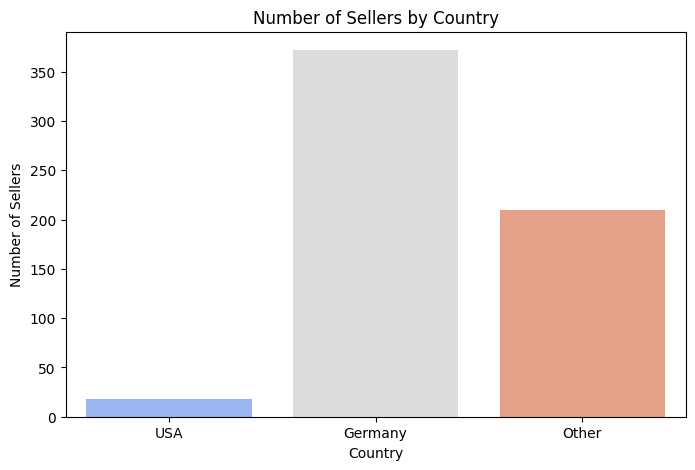

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x="business_country", palette="coolwarm")
plt.xlabel("Country")
plt.ylabel("Number of Sellers")
plt.title("Number of Sellers by Country")
plt.show()

In [22]:
# Save the cleaned dataset without ranking
output_file = "cleaned_sellers.csv"
df_filtered.to_csv(output_file, index=False)
print(f"Final cleaned dataset saved as CSV: {output_file}")

# Display a preview of the cleaned dataset
df_filtered.head()

Final cleaned dataset saved as CSV: cleaned_sellers.csv


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,product_count,rating_percent,total_ratings,business_country,seller_score,email,phone_number
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,1.0,88.0,118.0,USA,1221.10,jadgemaello@gmail.com,10022-6630
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,90.0,566.0,Germany,163.30,info@1a-handelsagentur.de,039932-829721
5,2020-11-15,Garden,Seller 6,Seller 6-link,Seller 6-storefrontlink,1-16 of 28 results,NaN,7830jeff is committed to providing each custom...,NaN,NaN,...,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1.0,NaN,NaN,Other,623.00,None,None
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,1.0,97.0,116.0,Germany,388.20,webmaster@9pm-store.de,26\n 33829
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,...,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,NaN,76.0,3721.0,Germany,300.05,abc-markt@web.de,10\n 32469
